## Método de Verlet

Se usa para ecuaciones diferenciales de segundo orden de la forma $y'' = F(y)$

\begin{equation}
y_{i+1} = 2y_i-y_{i-1}+y'' (\Delta x) ^2
\end{equation}

Para hallar el paso previo al de arranque:

\begin{equation}
y_{i-1} = y_i - y'_i \Delta x + \frac{F(y)}{2} (\Delta x)^2
\end{equation}

#### Caída libre

\begin{equation}
y'' = -g \\
y(0) = 50 \\
y'(0) = 0
\end{equation}

In [50]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81

def F(y): return -g

def Verlet(F, x0, a, b, h):
    T = np.arange(a,b,h)
    Y = np.zeros(len(T))
    
    Y[1] = x0[0]
    Y[0] = x0[0] - x0[1]*h + 0.5*F(x0[0])*h**2
    
    for i in range(1,len(Y)-1):
        Y[i+1] = 2*Y[i] - Y[i-1] + F(Y[i])*h**2
    
    Y_teo = x0[0] + x0[1]*T - 0.5*g*T**2
    
    return T, Y, Y_teo

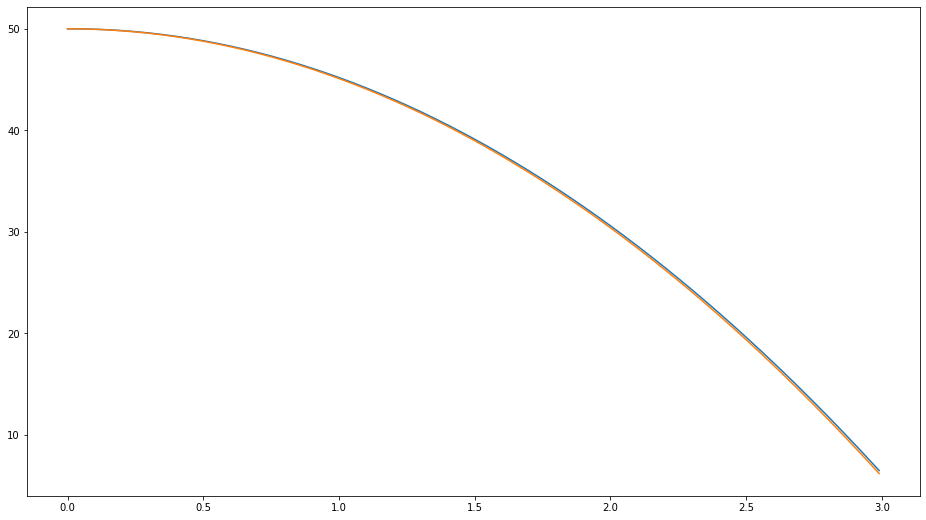

In [51]:
t,y,ya = Verlet(F, [50,0], 0,3,0.01)

plt.figure(figsize=(16,9))
plt.plot(t,y)
plt.plot(t,ya)

### Gravitación universal

\begin{equation}
F = G \frac{Mn}{r^2}
\end{equation}

In [55]:
import pandas as pd

radios = [0.387, 0.723, 1.00, 1.524, 5.203, 9.537, 19.191, 30.069]
planetas = ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"]

planra = dict(zip(planetas, radios))



In [62]:
G = 6.674e-11
M = 2e30

def F(x,y): return G*M/(x**2+y**2)

def Verlet2D(F, x0, a, b, h):
    T = np.arange(a,b,h)
    X = np.zeros(len(T))
    Y = np.zeros(len(T))
    
    X[1] = x0
    Y[1] = 0
    
    v0 = np.sqrt(G*M/x0)
    
    X[0] = 0
    Y[0] = x0 - v0*h + 0.5*F(x0,0)*h**2
    
    for i in range(1,len(Y)-1):
        X[i+1] = 2*X[i] - X[i-1] + F(X[i],Y[i])*h**2
        Y[i+1] = 2*Y[i] - Y[i-1] + F(X[i],Y[i])*h**2
        
    return T, X, Y

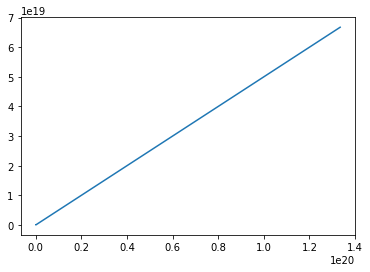

In [63]:
t, x, y = Verlet2D(F, planra['Tierra'],0,365,1/365 )
plt.plot(x,y)o 